In [32]:
import numpy as np
import tensorflow as tf

In [33]:
# Datos de entrada (compuestas por las compuertas AND)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Etiquetas de salida para la compuerta AND
y = np.array([[0], [0], [0], [1]])

# Crear un modelo secuencial
model = tf.keras.Sequential()

# Agregar una capa densa (perceptrón) con una única neurona y función de activación sigmoidal
model.add(tf.keras.layers.Dense(1, input_dim=2, activation='sigmoid'))

# Compilar el modelo con el optimizador 'adam' y la función de pérdida de entropía cruzada binaria
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con los datos de entrada y salida
model.fit(X, y, epochs=1000, verbose=0)

# Evaluar el modelo
loss, accuracy = model.evaluate(X, y)
print("Accuracy:", accuracy)

# Predicción de la compuerta AND
predictions = model.predict(X)
print("Predicciones:")
for i in range(len(X)):
    print(f"Entrada: {X[i]}, Predicción: {round(predictions[i][0])}")


C:\Users\jairo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 1.0000 - loss: 0.5029
Accuracy: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicciones:
Entrada: [0 0], Predicción: 0
Entrada: [0 1], Predicción: 0
Entrada: [1 0], Predicción: 0
Entrada: [1 1], Predicción: 1


In [42]:
import numpy as np
import tensorflow as tf

# Datos de entrada (compuestas por las compuertas XOR)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Etiquetas de salida para la compuerta XOR
y = np.array([[0], [1], [1], [0]])

# Crear un modelo secuencial
model = tf.keras.Sequential()

# Agregar una capa oculta con 4 neuronas y función de activación ReLU
model.add(tf.keras.layers.Dense(8, input_dim=2, activation='relu'))

# Agregar una capa de salida con una única neurona y función de activación sigmoidal
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compilar el modelo con el optimizador 'adam' y la función de pérdida de entropía cruzada binaria
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con los datos de entrada y salida
model.fit(X, y, epochs=2000, verbose=0)

# Predicción de la compuerta XOR
predictions = model.predict(X)
print("Predicciones:")
for i in range(len(X)):
    print(f"Entrada: {X[i]}, Predicción: {round(predictions[i][0])}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicciones:
Entrada: [0 0], Predicción: 0
Entrada: [0 1], Predicción: 1
Entrada: [1 0], Predicción: 1
Entrada: [1 1], Predicción: 0


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Cargar los datos desde el archivo CSV
datos = pd.read_csv('datos_tiro_parabolico.csv')

# Dividir los datos en características (X) y etiquetas (y)
X = datos[['x']].values
y = datos[['y']].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo secuencial de red neuronal
model = Sequential()

# Agregar capas intermedias (opcional)
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))

# Agregar la capa de salida
model.add(Dense(1, activation='linear'))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=5000, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5000


C:\Users\jairo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 2s 885ms/step - loss: 1.4471WARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_test_function.<locals>.one_step_on_iterator at 0x0000028FBA88EA20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 1.3655 - val_loss: 1.2721
Epoch 2/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.1387 - val_loss: 1.2356
Epoch 3/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.2630 - val_los

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


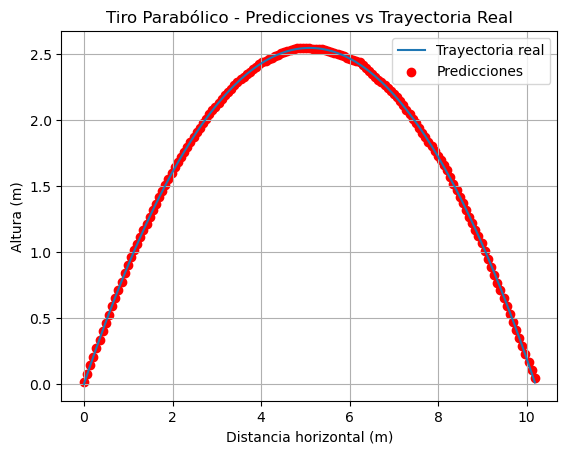

In [51]:
trayectoria_real = datos.to_numpy()

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(trayectoria_real[:, 0].reshape(-1, 1))

# Graficar la trayectoria real y las predicciones
plt.plot(trayectoria_real[:, 0], trayectoria_real[:, 1], label='Trayectoria real')
plt.scatter(trayectoria_real[:, 0], predicciones, color='red', label='Predicciones')
plt.xlabel('Distancia horizontal (m)')
plt.ylabel('Altura (m)')
plt.title('Tiro Parabólico - Predicciones vs Trayectoria Real')
plt.legend()
plt.grid(True)
plt.show()
